In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score,f1_score
from oversampler_funtion import over_sampler
import missingno as msno

In [132]:
df = pd.read_csv('../../Data/complete_fire.csv')
df.head()

,unique_fire_identifier,lattitude,longitude,acres_burned,fire_cause,incident_name,IsFSAssisted,origin_county,state,year,...,area (acres),population,d0,d1,d2,d3,d4,DSCI_avg,DSCI_summed,precipitation(in)
0,2003-WYCMX-200237,-105.563067,44.603340,139.091837,Unknown,SCHWARTZ,1.0,Campbell,WY,2003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-CABDU-006784,-117.076679,34.733894,1906.698008,Unknown,MENTONE,1.0,San Bernardino,CA,2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-IDGBK-000002,-116.216680,43.666673,685.728842,Unknown,NIFC RAMP SUPPORT,1.0,Ada,ID,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-IDCTF-008902,-111.426912,42.096336,20.000000,Unknown,St. Charles RX,0.0,Bear Lake,ID,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-AZPNF-000975,-112.072414,34.598306,77.946287,Unknown,Mingus/Cherry Rx,0.0,Yavapai,AZ,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df[df['value'].isnull()]

,unique_fire_identifier,lattitude,longitude,acres_burned,fire_cause,incident_name,IsFSAssisted,origin_county,state,year,...,area (acres),population,d0,d1,d2,d3,d4,DSCI_avg,DSCI_summed,precipitation(in)
0,2003-WYCMX-200237,-105.563067,44.603340,139.091837,Unknown,SCHWARTZ,1.0,Campbell,WY,2003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-CABDU-006784,-117.076679,34.733894,1906.698008,Unknown,MENTONE,1.0,San Bernardino,CA,2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-IDGBK-000002,-116.216680,43.666673,685.728842,Unknown,NIFC RAMP SUPPORT,1.0,Ada,ID,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-IDCTF-008902,-111.426912,42.096336,20.000000,Unknown,St. Charles RX,0.0,Bear Lake,ID,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-AZPNF-000975,-112.072414,34.598306,77.946287,Unknown,Mingus/Cherry Rx,0.0,Yavapai,AZ,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213782,2022-AZFTA-000099,-109.517310,33.838995,184.071419,Undetermined,Ranch Fire,1.0,Apache,AZ,2022,...,NaN,NaN,13.58,26.65,53.49,6.28,0.0,283.87,283.87,NaN
213783,2022-CARRU-051264,-116.218479,33.744119,40.421663,Undetermined,AVE 42 INDO,0.0,Riverside,CA,2022,...,NaN,NaN,0.00,6.35,52.97,40.67,0.0,537.64,537.64,NaN
213784,2022-CARRU-051265,-117.214449,33.635122,0.010000,Undetermined,PENCIN RD MENI,0.0,Riverside,CA,2022,...,NaN,NaN,0.00,6.35,52.97,40.67,0.0,537.64,537.64,NaN
213785,2022-CALAC-118006,-118.290812,34.234815,40.421663,Undetermined,LAC-118006,0.0,Los Angeles,CA,2022,...,NaN,NaN,0.00,6.35,52.97,40.67,0.0,537.64,537.64,NaN


In [134]:
df.columns

Index(['unique_fire_identifier', 'lattitude', 'longitude', 'acres_burned',
       'fire_cause', 'incident_name', 'IsFSAssisted', 'origin_county', 'state',
       'year', 'month', 'value', 'anomaly', 'area (acres)', 'population', 'd0',
       'd1', 'd2', 'd3', 'd4', 'DSCI_avg', 'DSCI_summed', 'precipitation(in)'],
      dtype='object')

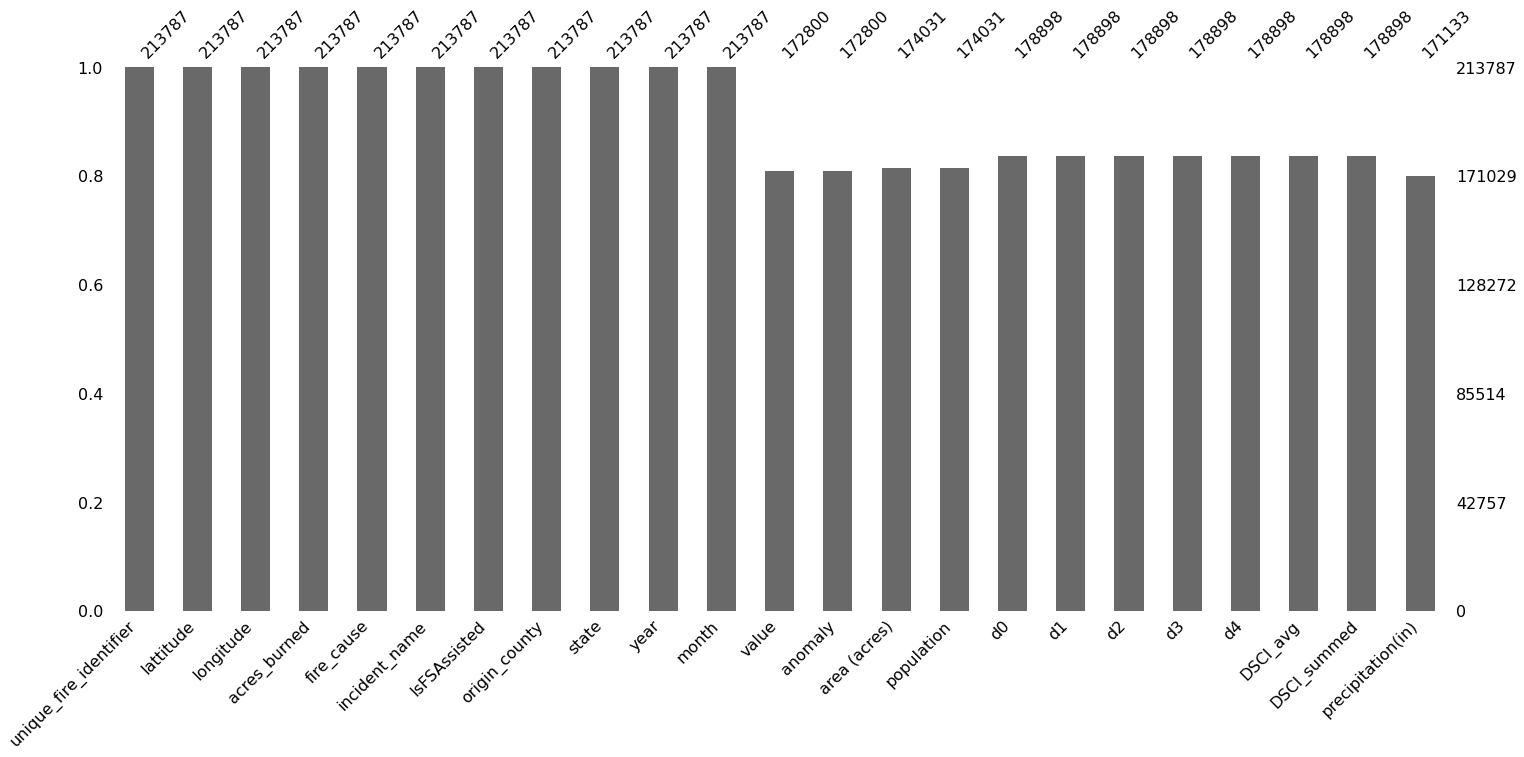

In [135]:
msno.bar(df); 

In [136]:
df[df.isna().any(axis=1)]['state'].shape

(46514,)

Tranform piece alteration based on source for filling na by multiple columns ([Stack OVerflow Reference](https://stackoverflow.com/questions/59001622/pandas-fillna-from-mean-with-groupby-for-multiple-columns))

In [137]:
print(df.columns)


Index(['unique_fire_identifier', 'lattitude', 'longitude', 'acres_burned',
       'fire_cause', 'incident_name', 'IsFSAssisted', 'origin_county', 'state',
       'year', 'month', 'value', 'anomaly', 'area (acres)', 'population', 'd0',
       'd1', 'd2', 'd3', 'd4', 'DSCI_avg', 'DSCI_summed', 'precipitation(in)'],
      dtype='object')


In [138]:
df['state'].unique()

array(['WY', 'CA', 'ID', 'AZ', 'TX', 'CO', 'MN', 'UT', 'WI', 'MT', 'SC',
       'NV', 'OR', 'NM', 'FL', 'AK', 'KY', 'IA', 'PA', 'WA', 'OK', 'SD',
       'MS', 'AR', 'ND', 'NY', 'LA', 'MI', 'GA', 'NC', 'TN', 'NE', 'NJ',
       'VA', 'NH', 'KS', 'AL', 'IL', 'MO', 'HI', 'ME', 'WV', 'OH', 'MD',
       'MA', 'IN', 'VT', 'DC', 'CT', 'DE'], dtype=object)

Regions of the US broken down by Census Bureau-designated regions and divisions (would move forward and cross reference to ensure they have similar climate characteristics

In [139]:
NW_Pacific         = ['WA','OR' ] # HI & ALASKA HAVE DIFF WEATHER
NE                 = ['CT', 'ME', 'MA', 'NH','RI',  'VT']
Mid_Atlantic       = ['NJ', 'NY',  'PA']
East_North_Central = ['IL', 'IN', 'MI', 'OH',  'WI']
West_North_Central = ['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
South_Atlantic     = ['DE', 'FL', 'GA' , 'MD','NC','DC', 'SC', 'VA' , 'WA','WV']
East_South_Central = ['AL', 'KY', 'MS',  'TN']


West_South_Central = ['AR', 'LA', 'OK',  'TX']
Mountain           = ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT',  'WY']
Pacific            = ['AK', 'CA', 'HI', 'OR', 'WA']

Northwest Pacific   = ['WA','OR' ] # HI & ALASKA HAVE DIFF WEATHER
Northeast = [Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island,  Vermont]
Mid_Atlantic  = [New Jersey, New York,  Pennsylvania]
East North Central = Illinois, Indiana, Michigan, Ohio, and Wisconsin
West North Central = [Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota]
South Atlantic  = [Delaware; Florida; Georgia; Maryland; North Carolina; South Carolina; Virginia; Washington, D.C., West Virginia]
East South Central  = Alabama, Kentucky, Mississippi, and Tennessee


West South Central  = Arkansas, Louisiana, Oklahoma, and Texa


Mountain =  [Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming]
Pacific  = [Alaska, California, Hawaii, Oregon, and Washington]

In [140]:
regions = []
for state in df['state']:
    #print(type(obs))
    if state in NW_Pacific:
        regions.append('NW_Pacific')
    elif state in NE:
        regions.append('NE')
    elif state in Mid_Atlantic:
        regions.append('Mid_Atlantic')
    elif state in East_North_Central:
        regions.append('East_North_Central')
    elif state in West_North_Central:
        regions.append('West_North_Central')
    elif state in South_Atlantic:
        regions.append('South_Atlantic')
    elif state in East_South_Central:
        regions.append('East_South_Central')
    elif state in West_South_Central:
        regions.append('West_South_Central')
    elif state in Mountain:
        regions.append('Mountain')
    elif state in Pacific:
        regions.append('Pacific')
    else:
        print(state)
df['regions'] = regions

In [141]:
df['regions'].isnull().sum()

0

In [142]:
nulls_colums = ['value', 'anomaly', 'area (acres)', 'population', 'd0',
       'd1', 'd2', 'd3', 'd4', 'DSCI_avg', 'DSCI_summed', 'precipitation(in)']

In [143]:
df[nulls_colums].isnull().sum()

value                40987
anomaly              40987
area (acres)         39756
population           39756
d0                   34889
d1                   34889
d2                   34889
d3                   34889
d4                   34889
DSCI_avg             34889
DSCI_summed          34889
precipitation(in)    42654
dtype: int64

Quick peak with just one column to ensure it works

In [144]:
df_cleaned = df.copy()
df_cleaned['precipitation(in)'] = df_cleaned.groupby(['regions'])['precipitation(in)'].transform(lambda x: x.fillna(x.mean()))
df_cleaned[nulls_colums].isnull().sum()

value                40987
anomaly              40987
area (acres)         39756
population           39756
d0                   34889
d1                   34889
d2                   34889
d3                   34889
d4                   34889
DSCI_avg             34889
DSCI_summed          34889
precipitation(in)        0
dtype: int64

In [145]:
nulls_colums = nulls_colums[:-1]
nulls_colums

['value',
 'anomaly',
 'area (acres)',
 'population',
 'd0',
 'd1',
 'd2',
 'd3',
 'd4',
 'DSCI_avg',
 'DSCI_summed']

In [146]:
# will iterate over list and ensure columns have been filled afterwards
#nulls_colums = nulls_colums[:-1] # already did precipitation so removing from list
for column in nulls_colums:
    df_cleaned[column] = df_cleaned.groupby(['regions'])[column].transform(lambda x: x.fillna(x.mean()))
df_cleaned[['value', 'anomaly', 'area (acres)', 'population', 'd0',
       'd1', 'd2', 'd3', 'd4', 'DSCI_avg', 'DSCI_summed', 'precipitation(in)']].isnull().sum()

value                0
anomaly              0
area (acres)         0
population           0
d0                   0
d1                   0
d2                   0
d3                   0
d4                   0
DSCI_avg             0
DSCI_summed          0
precipitation(in)    0
dtype: int64

In [147]:
df_cleaned.head()

,unique_fire_identifier,lattitude,longitude,acres_burned,fire_cause,incident_name,IsFSAssisted,origin_county,state,year,...,population,d0,d1,d2,d3,d4,DSCI_avg,DSCI_summed,precipitation(in),regions
0,2003-WYCMX-200237,-105.563067,44.603340,139.091837,Unknown,SCHWARTZ,1.0,Campbell,WY,2003,...,3.303917e+06,18.249151,14.653462,12.028498,11.200130,5.348644,184.442738,802.985483,0.049736,Mountain
1,2004-CABDU-006784,-117.076679,34.733894,1906.698008,Unknown,MENTONE,1.0,San Bernardino,CA,2004,...,3.680509e+07,12.676957,14.073960,14.320113,15.726569,9.183301,225.324333,972.517550,0.020251,Pacific
2,2008-IDGBK-000002,-116.216680,43.666673,685.728842,Unknown,NIFC RAMP SUPPORT,1.0,Ada,ID,2008,...,3.303917e+06,18.249151,14.653462,12.028498,11.200130,5.348644,184.442738,802.985483,0.049736,Mountain
3,2008-IDCTF-008902,-111.426912,42.096336,20.000000,Unknown,St. Charles RX,0.0,Bear Lake,ID,2008,...,3.303917e+06,18.249151,14.653462,12.028498,11.200130,5.348644,184.442738,802.985483,0.049736,Mountain
4,2008-AZPNF-000975,-112.072414,34.598306,77.946287,Unknown,Mingus/Cherry Rx,0.0,Yavapai,AZ,2008,...,3.303917e+06,18.249151,14.653462,12.028498,11.200130,5.348644,184.442738,802.985483,0.049736,Mountain


In [148]:
df_cleaned.to_csv('../../Data/imputed_complete_fire.csv')

In [149]:
df_cleaned.isnull().sum()

unique_fire_identifier    0
lattitude                 0
longitude                 0
acres_burned              0
fire_cause                0
incident_name             0
IsFSAssisted              0
origin_county             0
state                     0
year                      0
month                     0
value                     0
anomaly                   0
area (acres)              0
population                0
d0                        0
d1                        0
d2                        0
d3                        0
d4                        0
DSCI_avg                  0
DSCI_summed               0
precipitation(in)         0
regions                   0
dtype: int64